In [2]:
import numpy as np

df = np.array([1, 2, 3, 4, 5])

df.mean()

print(df)
print(f'Media = {df.mean()}')

[1 2 3 4 5]
Media = 3.0


In [6]:
# Limpeza de dados
# Remocao de valores ausentes

import pandas as pd

df.dropna() # Remove linhas com valores ausentes
df.fillna(df.mean()) # Substitui valores ausentes pela média da coluna


In [ ]:
# Tratamento de outliers
# Utilizando Z-score

from scipy import stats
df = df[(stats.zscore(df) < 3).all(axis=1)] # Remove valores com Z-score maior que 3


In [ ]:
# Normalizacao (Z-score normalization)
# Escalar os valores em um intervalo geralmente entre 0 e 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['coluna']] = scaler.fit_transform(df[['coluna']])

In [ ]:
# Padronizacao (Z-score Stardarddization)
# Transforma os dados para ter media 0 e desvio padrao 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['coluna']] = scaler.fit_transform(df[['coluna']])

In [7]:
# Transformacao de dados
# Sao necessarias quando os dados precisam ser convertidos em um formato adequado para o modelo
# One-hot encoding (Transforma variaveis categoricas em variaveis binarias)

import pandas as pd
from sklearn.preprocessing import LabelEncoder

pd.get_dummies(df, columns=['cor'])

# Label encoding (Converte categorias em numeros inteiros)
# Exemplo [baixo, medio, alto] -> [0, 1, 2]

encoder = LabelEncoder()

df['cor'] = encoder.fit_transform(df['cor'])

In [10]:
import pandas as pd
import numpy as np

# Criando um array com numpy
array = np.array([1, 2, 3, 4, 5])
print(f'Media = {array.mean()}')

# Criando um dataframe com pandas
df = pd.DataFrame({'Nome': ['A', 'B', 'C'], 'Idade': [10, 15, 20]})
print(df)
print(df.describe())

Media = 15
  Nome  Idade
0    A     10
1    B     15
2    C     20
       Idade
count    3.0
mean    15.0
std      5.0
min     10.0
25%     12.5
50%     15.0
75%     17.5
max     20.0


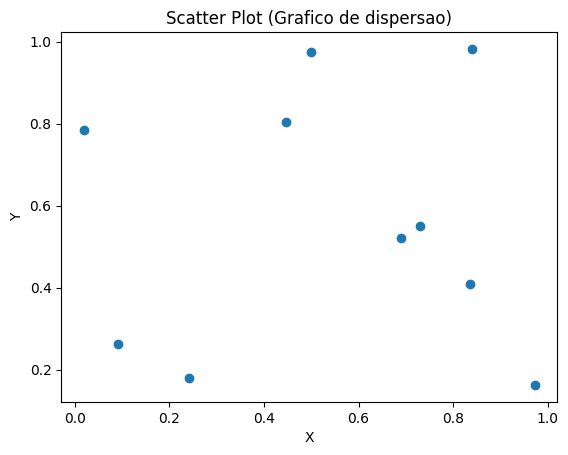

In [11]:
# Graficos com matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Criando grafico de dispersao
x = np.random.rand(10)
y = np.random.rand(10)
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot (Grafico de dispersao)')
plt.show()

In [3]:
# Classificacao com scikit-learn
# Exemplo de modelo com regressao

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Carregar dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Dividir treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Treinar o modelo
modelo = LogisticRegression()
modelo.fit(x_train, y_train)

# testar o modelo
y_pred = modelo.predict(x_test)
print('Acuracia:', accuracy_score(y_test, y_pred))

Acuracia: 1.0


In [2]:
# Implementacao de algoritmos de busca
# BFS (Bredth first search)

from collections import deque

def bfs(graph, start, goal):
    queue = deque([[start]])
    visited = set()

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node == goal:
            return path

        for neighbor in graph.get(node, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(path + [neighbor])

    return None

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

print("Caminho BFS:", bfs(graph, 'A', 'F'))

Caminho BFS: ['A', 'C', 'F']


In [1]:
# Implementacao do algoritmo A*

import heapq

def heuristica(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Distância de Manhattan

def a_star(mapa, inicio, objetivo):
    lista_aberta = []
    heapq.heappush(lista_aberta, (0, inicio))
    caminho = {inicio: None}
    g_score = {inicio: 0}

    while lista_aberta:
        _, atual = heapq.heappop(lista_aberta)

        if atual == objetivo:
            caminho_reconstruido = []
            while atual:
                caminho_reconstruido.append(atual)
                atual = caminho[atual]
            return caminho_reconstruido[::-1]

        for vizinho in [(0,1), (0,-1), (1,0), (-1,0)]:  # Movimentos possíveis
            novo = (atual[0] + vizinho[0], atual[1] + vizinho[1])

            if novo not in mapa:
                continue

            novo_g = g_score[atual] + 1
            if novo not in g_score or novo_g < g_score[novo]:
                g_score[novo] = novo_g
                prioridade = novo_g + heuristica(novo, objetivo)
                heapq.heappush(lista_aberta, (prioridade, novo))
                caminho[novo] = atual

    return None

mapa = {(x, y) for x in range(5) for y in range(5)}
inicio = (0, 0)
objetivo = (4, 4)

print("Caminho A*:", a_star(mapa, inicio, objetivo))


Caminho A*: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]
